This project use datasets provided [here!](https://archive.ics.uci.edu/ml/datasets/Student+Performance) to find relationship between final grade with comparison to other data attributes which includes student grades, demographic, social and school related features. 


In [1]:
# Installations of packages used in the projects
# remove or use '#' if package not installed
# install.packages('ggplot2',repos = 'http://cran.us.r-project.org')
# install.packages('dplyr',repos = 'http://cran.us.r-project.org')
# install.packages('corrplot',repos = 'http://cran.us.r-project.org')
# install.packages('caTools',repos = 'http://cran.us.r-project.org')

In [2]:
# import libraries
library(ggplot2)
library(dplyr)
library(caTools)
library(corrplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.84 loaded



In [3]:
# Read CSV into dataframe
df <- read.csv('student-mat.csv',sep=';')

In [4]:
# Explore structure of dataframe
str(df)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [5]:
# explore data
summary(df)

 school   sex          age       address famsize   Pstatus      Medu      
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281   A: 41   Min.   :0.000  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114   T:354   1st Qu.:2.000  
                  Median :17.0                             Median :3.000  
                  Mean   :16.7                             Mean   :2.749  
                  3rd Qu.:18.0                             3rd Qu.:4.000  
                  Max.   :22.0                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason      guardian  
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.000   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.522   services:103   services:111   reputation:105               
 3rd Qu.:3.000   teacher : 58   teacher : 29                                
 Max.   :4.00

In [6]:
# check if any data is missing or NA
any(is.na(df))

[1] FALSE

In [7]:
# to check whether categorical values are factor or not
str(df)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [8]:
# Grab only numeric columns
num.cols <- sapply(df, is.numeric)

# Filter to numeric columns for correlation
cor.data <- cor(df[,num.cols])

# check correlation or pearson's r
cor.data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000000,-0.163658419,-0.163438069,0.070640721,-0.004140037,0.24366538,0.053940096,0.01643439,0.126963880,0.131124605,0.11727605,-0.062187369,0.17523008,-0.06408150,-0.14347405,-0.16157944
Medu,-0.163658419,1.000000000,0.623455112,-0.171639305,0.064944137,-0.23667996,-0.003914458,0.03089087,0.064094438,0.019834099,-0.04712346,-0.046877829,0.10028482,0.20534100,0.21552717,0.21714750
Fedu,-0.163438069,0.623455112,1.000000000,-0.158194054,-0.009174639,-0.25040844,-0.001369727,-0.01284553,0.043104668,0.002386429,-0.01263102,0.014741537,0.02447289,0.19026994,0.16489339,0.15245694
traveltime,0.070640721,-0.171639305,-0.158194054,1.000000000,-0.100909119,0.09223875,-0.016807986,-0.01702494,0.028539674,0.138325309,0.13411575,0.007500606,-0.01294378,-0.09303999,-0.15319796,-0.11714205
studytime,-0.004140037,0.064944137,-0.009174639,-0.100909119,1.000000000,-0.17356303,0.039730704,-0.14319841,-0.063903675,-0.196019263,-0.25378473,-0.075615863,-0.06270018,0.16061192,0.13588000,0.09781969
failures,0.243665377,-0.236679963,-0.250408444,0.092238746,-0.173563031,1.00000000,-0.044336626,0.09198747,0.124560922,0.136046931,0.14196203,0.065827282,0.06372583,-0.35471761,-0.35589563,-0.36041494
famrel,0.053940096,-0.003914458,-0.001369727,-0.016807986,0.039730704,-0.04433663,1.000000000,0.15070144,0.064568411,-0.077594357,-0.11339731,0.094055728,-0.04435409,0.02216832,-0.01828135,0.05136343
freetime,0.016434389,0.030890867,-0.012845528,-0.017024944,-0.143198407,0.09198747,0.150701444,1.00000000,0.285018715,0.209000848,0.14782181,0.075733357,-0.05807792,0.01261293,-0.01377714,0.01130724
goout,0.126963880,0.064094438,0.043104668,0.028539674,-0.063903675,0.12456092,0.064568411,0.28501871,1.000000000,0.266993848,0.42038575,-0.009577254,0.04430222,-0.14910397,-0.16225003,-0.13279147
Dalc,0.131124605,0.019834099,0.002386429,0.138325309,-0.196019263,0.13604693,-0.077594357,0.20900085,0.266993848,1.000000000,0.64754423,0.077179582,0.11190803,-0.09415879,-0.06412018,-0.05466004


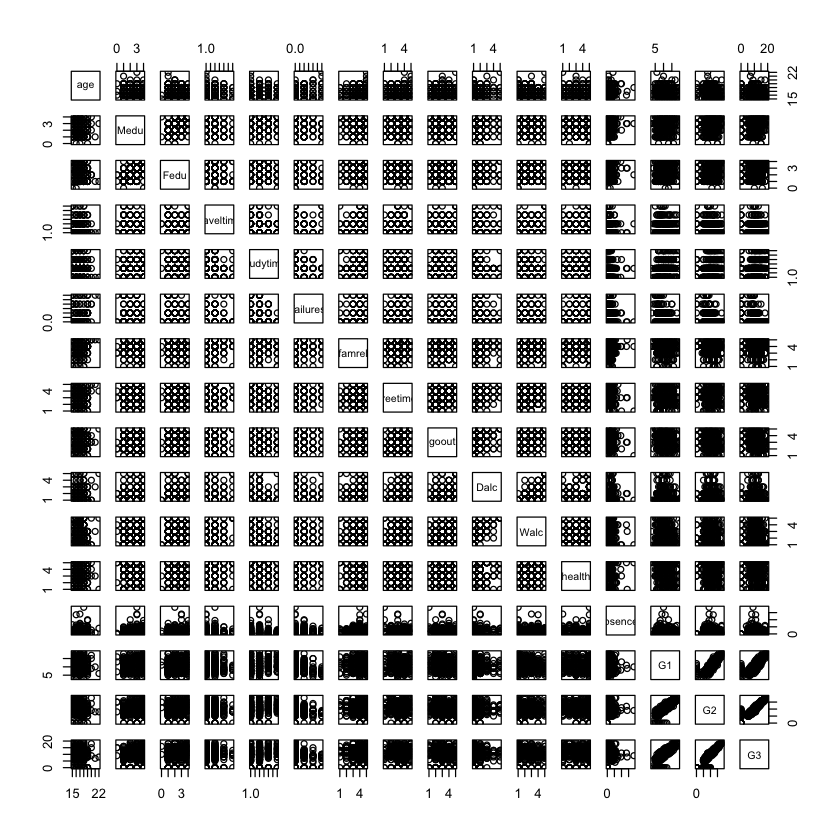

In [9]:
# pair wise comparison graph
pairs(df[,num.cols],pch=21)

Its very Hard to Read data using pairs method. But we can see that G1, G2 and G3 are the only values that shows high correlations. Now we will be using CorrPlot to be sure that is the case.

In [10]:
#install.packages('corrplot',repos = 'http://cran.us.r-project.org')

In [11]:

#library(corrplot)

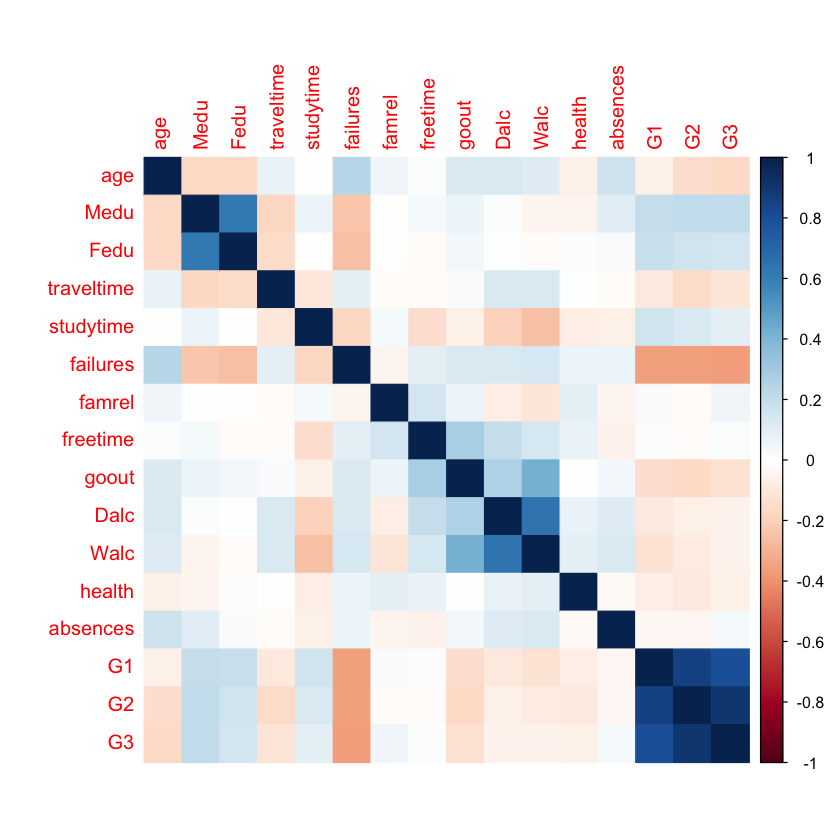

In [12]:
corrplot(cor.data,method='color')

This plot gives us better understanding that G1,G2 and G3 are strongly positive correlated and failures has moderately negative correlation, <br>meaning good students do well each period, and poor students do poorly each period, etc.

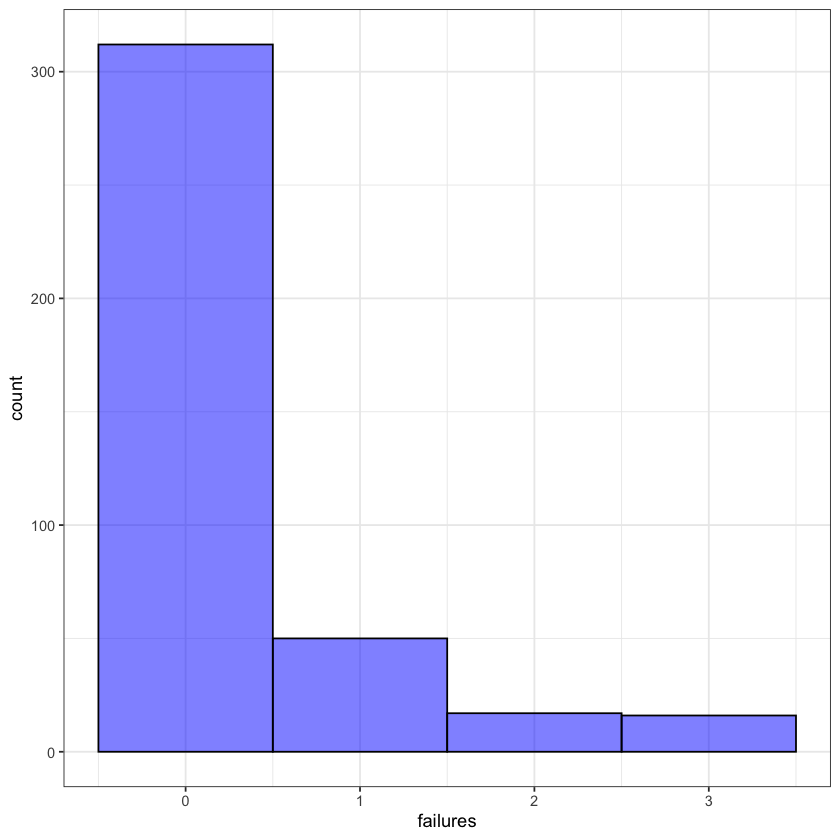

In [13]:
# plotting histogram of Failures, G1, G2 and G3

# histogram of Failures
fail.hist <- ggplot(df,aes(x=failures)) + geom_histogram(bins=4,alpha=0.5,fill='blue',color='black') + theme_bw()
fail.hist

In [14]:
# histogram of G1, G2, G3
G1.hist <- ggplot(df,aes(x=G1)) + geom_histogram(bins=20,alpha=0.5,fill='blue',color='black') + theme_bw()
G2.hist <- ggplot(df,aes(x=G2)) + geom_histogram(bins=20,alpha=0.5,fill='blue',color='black') + theme_bw()
G3.hist <- ggplot(df,aes(x=G3)) + geom_histogram(bins=20,alpha=0.5,fill='blue',color='black') + theme_bw()


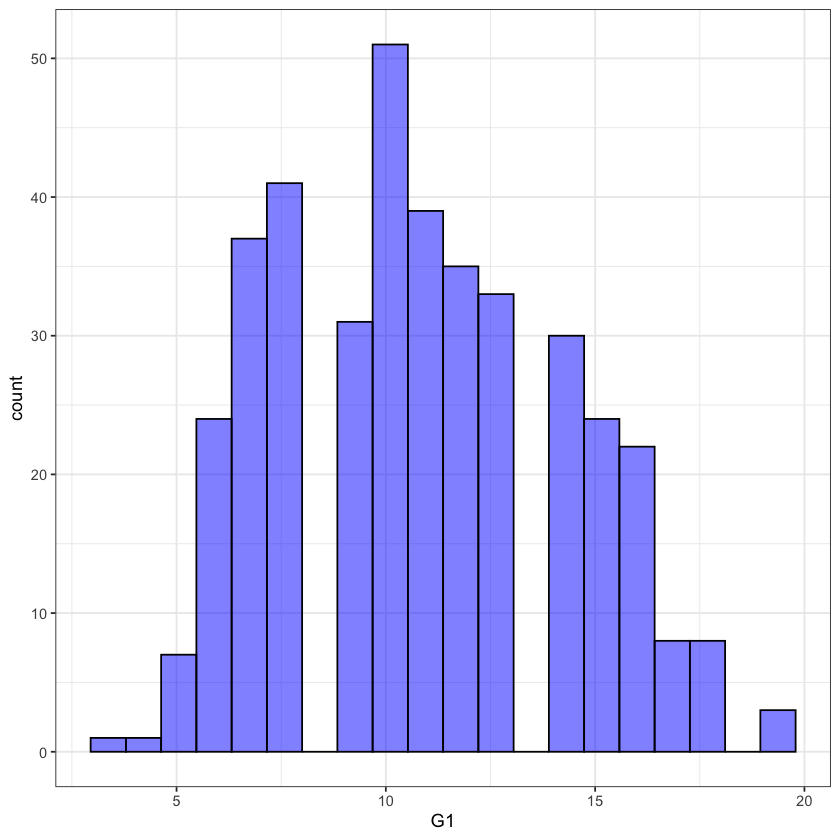

In [15]:
G1.hist

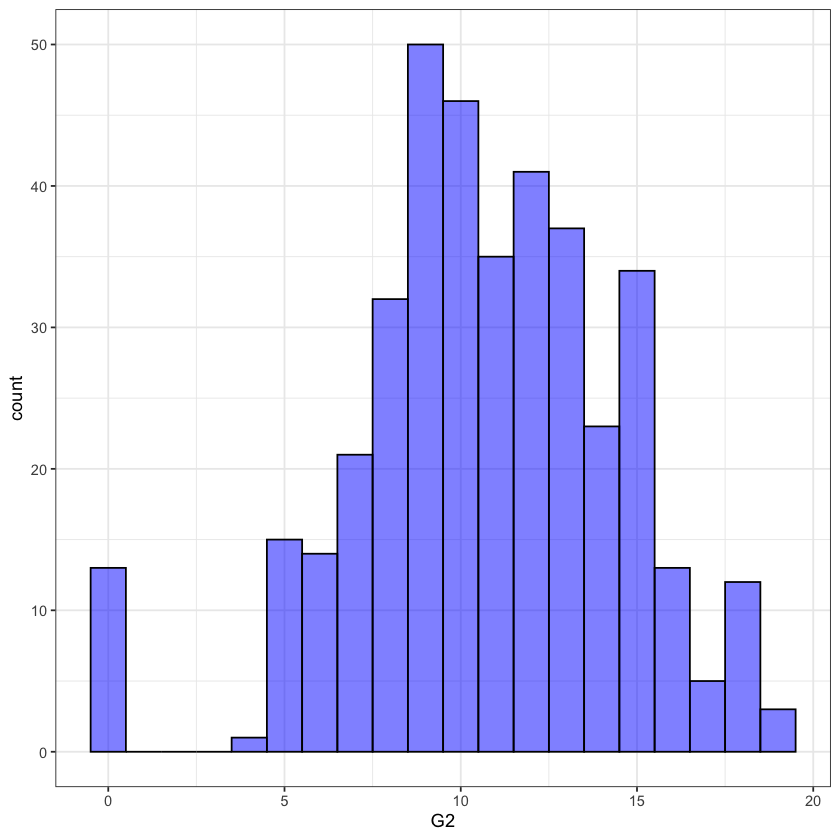

In [16]:
G2.hist

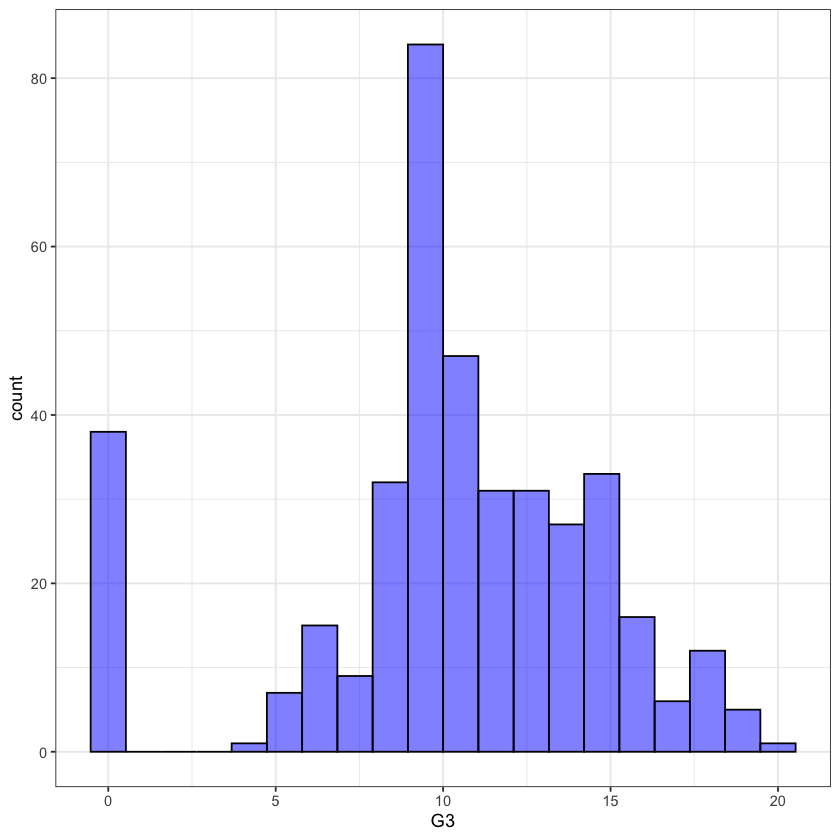

In [17]:
G3.hist

G1, G2, G3 follows normal distribution except G3 has few students with score 'ZERO'. It looks like students did not appeared the examination.

# Base model including G1,G2,G3 and Failure


In [18]:
# split data with 70 to 30 ratio

# set the seed to make your partition reproducible
set.seed(123)

sample <- sample.split(df$age,SplitRatio=0.7)
training.1 <- subset(df,sample=T)
test.1 <- subset(df,sample=F)

In [19]:
# train base model
base.lm.model <- lm(G3 ~ .,training.1)
summary(base.lm.model)


Call:
lm(formula = G3 ~ ., data = training.1)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9339 -0.5532  0.2680  0.9689  4.6461 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.115488   2.116958  -0.527 0.598573    
schoolMS          0.480742   0.366512   1.312 0.190485    
sexM              0.174396   0.233588   0.747 0.455805    
age              -0.173302   0.100780  -1.720 0.086380 .  
addressU          0.104455   0.270791   0.386 0.699922    
famsizeLE3        0.036512   0.226680   0.161 0.872128    
PstatusT         -0.127673   0.335626  -0.380 0.703875    
Medu              0.129685   0.149999   0.865 0.387859    
Fedu             -0.133940   0.128768  -1.040 0.298974    
Mjobhealth       -0.146426   0.518491  -0.282 0.777796    
Mjobother         0.074088   0.332044   0.223 0.823565    
Mjobservices      0.046956   0.369587   0.127 0.898973    
Mjobteacher      -0.026276   0.481632  -0.055 0.956522    
Fjobhealth        

In [20]:
# predict through base model
base.prediction <- predict(base.lm.model,test.1)

In [21]:
# convert all negative score to zero and more than 20 to 20
to.valid.score <- function(x){
    if(x < 0){
        return(0)
    }
    else if (x > 20){
        return(20)
    }
    else{
        return(x)
    }
}
    

In [22]:
# convert to legit value
base.prediction <- sapply(base.prediction,to.valid.score)

In [23]:
# Root Mean Square of the base model
base.mse <- mean((base.prediction-test.1$G3)^2)
base.rmse <- base.mse ^ 0.5
base.rmse

[1] 1.785851

In [24]:
# Tuning model by including on variable that show high correlation
tune.base.model.1 <- lm(G3 ~ failures+G1+G2,training.1)
summary(tune.base.model.1)


Call:
lm(formula = G3 ~ failures + G1 + G2, data = training.1)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5211 -0.3850  0.2584  0.9678  3.5781 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.54854    0.37538  -4.125 4.53e-05 ***
failures    -0.23299    0.14089  -1.654   0.0990 .  
G1           0.14346    0.05636   2.545   0.0113 *  
G2           0.97785    0.04976  19.651  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.933 on 391 degrees of freedom
Multiple R-squared:  0.8234,	Adjusted R-squared:  0.822 
F-statistic: 607.7 on 3 and 391 DF,  p-value: < 2.2e-16


In [25]:
# perform prediction for a tuned model
tune.prediction.1 <- predict(tune.base.model.1,test.1)


In [26]:
# convert to legit value using function 
## to.valid.score

tuned.prediction <- sapply(tune.prediction.1,to.valid.score)

In [27]:
# Root Mean Square of the base model
tuned.mse.1 <- mean((tuned.prediction-test.1$G3)^2)
tuned.rmse.1 <- tuned.mse.1 ^ 0.5
tuned.rmse.1

[1] 1.916782

## Comparing Base model including all factors and Tuned model including only high correlated independant variable. We can see Base model performs better and gives Root Mean Squared Error(RMSE) as 1.78 compared to Tuned model which gives 1.91.